<a href="https://colab.research.google.com/github/Lfahima/datasci_7_geospatial/blob/main/HHA507_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame as gdf

### Dataset #1

In [2]:
df_gpd = gpd.read_file('IndianWeatherRepository.csv')
df_gpd = df_gpd.loc[df_gpd['last_updated_epoch'] == '1693286100']
df_gpd

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,geometry
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93,None
1,India,Raisen,Madhya Pradesh,23.33,77.8,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93,None
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93,None
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93,None
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1693286100,2023-08-29 10:45,31.0,87.8,...,125.1,2,4,05:56 AM,06:45 PM,05:51 PM,03:28 AM,Waxing Gibbous,93,None
539,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1693286100,2023-08-29 10:45,28.3,82.9,...,9.9,1,1,05:00 AM,05:41 PM,04:39 PM,02:37 AM,Waxing Gibbous,93,None
540,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1693286100,2023-08-29 10:45,32.2,90.0,...,3.0,1,1,06:02 AM,06:26 PM,05:14 PM,03:56 AM,Waxing Gibbous,93,None
541,India,Tenkasi,Tamil Nadu,8.97,77.3,Asia/Kolkata,1693286100,2023-08-29 10:45,31.7,89.1,...,4.0,1,1,06:12 AM,06:31 PM,05:15 PM,04:12 AM,Waxing Gibbous,93,None


In [3]:
df_gpd = df_gpd[["temperature_fahrenheit", "latitude", "longitude"]]
df_gpd = df_gpd.astype(float)
df_gpd

,temperature_fahrenheit,latitude,longitude
0,81.5,24.57,77.72
1,81.5,23.33,77.80
2,79.3,22.07,78.93
3,78.1,21.86,77.93
4,81.0,22.75,77.72
...,...,...,...
538,87.8,28.88,77.53
539,82.9,23.97,92.58
540,90.0,12.93,79.33
541,89.1,8.97,77.30


### Description of dataset and it's attributes:
This dataset is on the weather report of major cities in India. It is very interesting because it is extremely descriptive and provides in depth data on everything related to weather/climate, such as air quality, pressures, wind directions, moon phase, wind gust, visability, and sunset/rise time, etc...
For this dataset I focused on the Longitude, Latitude, and temperature_fahrenheit -- which is as titled the degrees in fahrenheit in the major cities in India.



<Axes: >

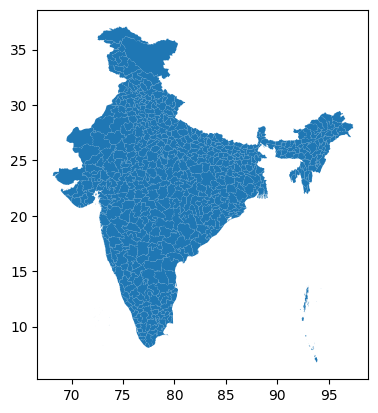

In [4]:
india_map = gpd.read_file('polbnda_ind.shp')
india_map.crs = "epsg:4326"
india_map.to_crs(epsg=4326).plot()

In [5]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df_gpd['longitude'], df_gpd['latitude'])]
geo_df = gpd.GeoDataFrame(df_gpd,
                          crs = crs,
                          geometry = geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'India Farenheit')

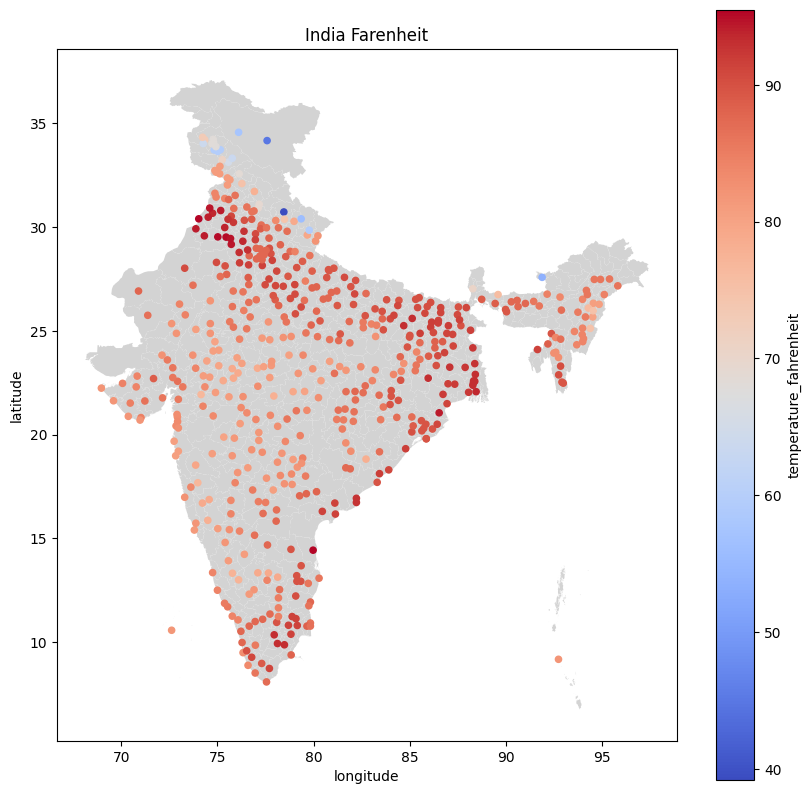

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
india_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, x="longitude", y="latitude", kind="scatter",
                   c="temperature_fahrenheit", colormap="coolwarm")
ax.set_title('India Farenheit')

### Patterns or anomalies noticed on the map:
I noticed that the temperature in fahrenheit is cooler in the north which is where alot of the mountains in India are located. I also noticed that most major cities in India that have hotter temperatures in fahrenheit are on the outer regions.

### Dataset #2

In [7]:
df_gpd_snow_crab = gpd.read_file('mfsnowcrab.csv')
df_gpd_snow_crab

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue,geometry
0,147038,57,-166.45,1975,snow crab,male,71,9.1,1.1,117,40356,None
1,147037,57,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691,None
2,147036,57,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748,None
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882,None
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258,None
...,...,...,...,...,...,...,...,...,...,...,...,...
17922,167236,59.01374,-169.17953,2018,snow crab,female,54,6.9,4.2,94,140,None
17923,167235,58.70274,-173.01226,2018,snow crab,female,113,7.6,3.5,150,435,None
17924,167234,58.67382,-172.36066,2018,snow crab,female,101,7.5,3.4,159,1880,None
17925,167233,58.66392,-171.72005,2018,snow crab,female,93,7.9,3.4,135,598,None


In [8]:
df_gpd_snow_crab = df_gpd_snow_crab[["bottom_depth", "latitude", "longitude"]]
df_gpd_snow_crab = df_gpd_snow_crab.astype(float)
df_gpd_snow_crab

,bottom_depth,latitude,longitude
0,71.0,57.00000,-166.45000
1,71.0,57.00000,-167.08333
2,75.0,57.00000,-167.68333
3,132.0,56.66667,-172.56667
4,123.0,56.66667,-171.96667
...,...,...,...
17922,54.0,59.01374,-169.17953
17923,113.0,58.70274,-173.01226
17924,101.0,58.67382,-172.36066
17925,93.0,58.66392,-171.72005


### Description of dataset and it's attributes:
This dataset is titled Snow Crab Geospatial Data and is focuses on commercial snow crabs and the capture rates in the Alaskan Eastern Berin Sea.
I focused on the longitude, latitude, and bottom_depth -- which is the calculated average depth in meters. The data for bottom_depth was calculated by adding "gear depth and net height".

<Axes: xlabel='longitude', ylabel='latitude'>

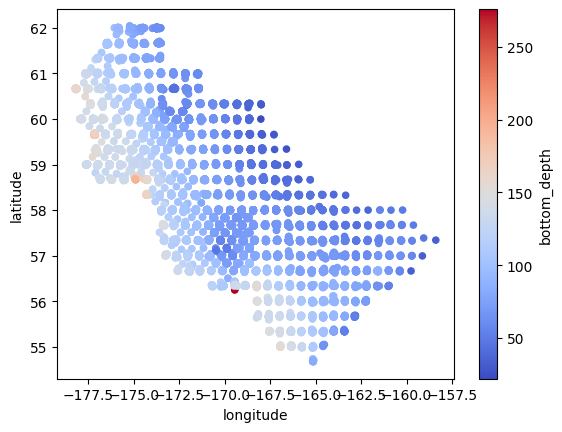

In [69]:
df_gpd_snow_crab.plot(x="longitude", y="latitude", kind="scatter",
                   c="bottom_depth", colormap="coolwarm")

### Dataset #3

In [10]:
df_gpd_poverty_us = gpd.read_file('School_Neighborhood_Poverty_Estimates_-_Current.csv')
df_gpd_poverty_us

,X,Y,OBJECTID,NAME,NCESSCH,IPR_EST,IPR_SE,SCHOOLYEAR,LAT,LON,geometry
0,-86.206204752,34.260206472,1,Albertville Middle School,010000500870,259,87,2020-2021,34.2602,-86.2062,None
1,-86.2049047519999,34.262206474,2,Albertville High School,010000500871,261,92,2020-2021,34.2622,-86.2049,None
2,-86.2201047569999,34.273306475,3,Albertville Intermediate School,010000500879,139,61,2020-2021,34.2733,-86.2201,None
3,-86.221810756,34.2527064710001,4,Albertville Elementary School,010000500889,227,110,2020-2021,34.2527,-86.221806,None
4,-86.193304751,34.289806479,5,Albertville Kindergarten and PreK,010000501616,373,124,2020-2021,34.2898,-86.1933,None
...,...,...,...,...,...,...,...,...,...,...,...
100677,-158.091096394,21.318520425,100678,Kapolei Charter School by Goodwill Hawaii,150003000302,402,76,2020-2021,21.318517,-158.091082,None
100678,-158.015575394,21.501793413,100679,Kamalani Academy,150003000303,327,86,2020-2021,21.50179,-158.015561,None
100679,-159.478274328,21.962166398,100680,Alaka'i O Kaua'i Charter School,150003000304,339,105,2020-2021,21.962163,-159.47826,None
100680,-158.020298397,21.3268864240001,100681,DreamHouse Ewa Beach,150003000305,438,40,2020-2021,21.326883,-158.020284,None


In [11]:
df_gpd_poverty_us = df_gpd_poverty_us[["IPR_EST", "LAT", "LON"]]
df_gpd_poverty_us = df_gpd_poverty_us.astype(float)
df_gpd_poverty_us

,IPR_EST,LAT,LON
0,259.0,34.260200,-86.206200
1,261.0,34.262200,-86.204900
2,139.0,34.273300,-86.220100
3,227.0,34.252700,-86.221806
4,373.0,34.289800,-86.193300
...,...,...,...
100677,402.0,21.318517,-158.091082
100678,327.0,21.501790,-158.015561
100679,339.0,21.962163,-159.478260
100680,438.0,21.326883,-158.020284


### Description of dataset and it's attributes:
This dataset is titled School Neighborhood Poverty Estimates - Current, and it is a dataset that reports the poverty rates of school neighborhoods in the year 2018-2019. Data was taken from the US census bureaua of families income who have children from ages 5-18 and school files. I focused on the latitude, longitude, and IPR_EST -- which was described on the website as the "percentage of family income as either being over or under the federal poverty rate" the IPR can range from 0-999, and the higher the IPR percentage the higher the poverty rate of the families in the school neighborhoods.

<Axes: >

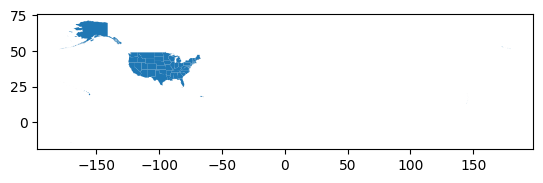

In [12]:
us_map = gpd.read_file('cb_2018_us_state_500k.shp')
us_map.crs = "epsg:4326"
us_map.to_crs(epsg=4326).plot()

In [20]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df_gpd_poverty_us['LON'], df_gpd_poverty_us['LAT'])]
geo_df_poverty_us = gpd.GeoDataFrame(df_gpd_poverty_us,
                          crs = crs,
                          geometry = geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Poverty US')

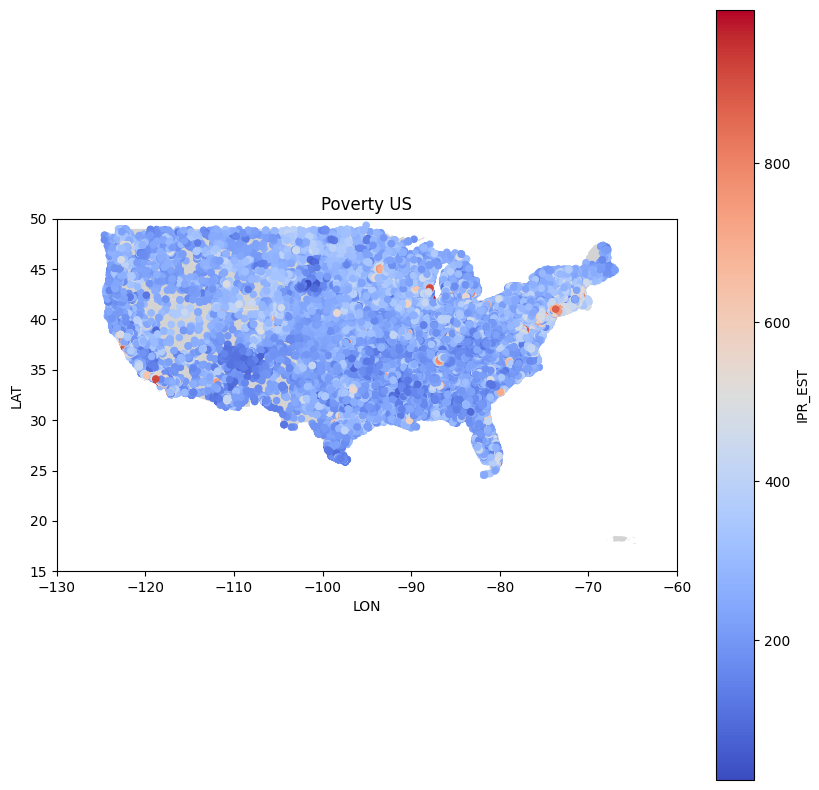

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
xlim = ([-130, -60])
ylim = ([15, 50])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
us_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df_poverty_us.plot(ax=ax, x="LON", y="LAT", kind="scatter",
                   c="IPR_EST", colormap="coolwarm")
ax.set_title('Poverty US')

### Patterns or anomalies noticed on the map:
I noticed that most states in the US had lower IPR rates, and only few sates (in red) had higher IPR rates, to demonstrate poverty in school neighborhoods.

### Dataset #4

In [26]:
df_gpd_file_aus = gpd.read_file('fire_nrt_V1_96617.csv')
df_gpd_file_aus = df_gpd_file_aus.loc[df_gpd_file_aus['acq_date'] == '2019-10-01']
df_gpd_file_aus

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,0336,N,VIIRS,n,1.0NRT,293.4,4,D,None
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,0336,N,VIIRS,n,1.0NRT,296.9,3.9,D,None
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,0336,N,VIIRS,n,1.0NRT,295.3,3.7,D,None
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,0336,N,VIIRS,n,1.0NRT,294.2,6.2,D,None
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,0336,N,VIIRS,n,1.0NRT,293.5,4.1,D,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,-20.82015,115.38498,302.4,0.57,0.69,2019-10-01,1818,N,VIIRS,n,1.0NRT,289.2,0.5,N,None
4341,-21.70062,114.99979,302.8,0.55,0.68,2019-10-01,1818,N,VIIRS,n,1.0NRT,289.1,1.4,N,None
4342,-21.70084,114.99987,303.9,0.55,0.68,2019-10-01,1818,N,VIIRS,n,1.0NRT,289.1,1.9,N,None
4343,-20.59944,116.78893,303.4,0.7,0.75,2019-10-01,1818,N,VIIRS,n,1.0NRT,292.4,6.1,N,None


In [27]:
df_gpd_file_aus = df_gpd_file_aus[["bright_ti4", "latitude", "longitude"]]
df_gpd_file_aus = df_gpd_file_aus.astype(float)
df_gpd_file_aus

,bright_ti4,latitude,longitude
0,333.6,-42.69706,147.70634
1,336.2,-42.26889,147.31104
2,327.9,-40.85202,145.38068
3,346.9,-42.39329,147.47144
4,334.1,-42.69701,147.70584
...,...,...,...
4340,302.4,-20.82015,115.38498
4341,302.8,-21.70062,114.99979
4342,303.9,-21.70084,114.99987
4343,303.4,-20.59944,116.78893


### Description of dataset and it's attributes:
This dataset is titled Fires from Space: Australia and it reports on the bushfires that have been occuring in Australia. What interested me about this dataset was that the data on the bushfires in Australia was taken from NASA, because the Author stated some news outlits were posting ambigious information regarding Australias fires and they wanted to publish accurate data.
I focused on latitude, lingitude and bright_ti4 -- which is the calculated brightness temperature in kelvin.

<Axes: >

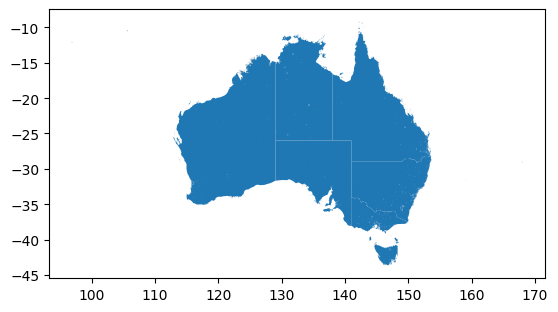

In [28]:
australia_map = gpd.read_file('SOS_2021_AUST_GDA2020.shp')
australia_map.crs = "epsg:4326"
australia_map.to_crs(epsg=4326).plot()

In [33]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df_gpd_file_aus['longitude'], df_gpd_file_aus['latitude'])]
geo_df_fire_aus = gpd.GeoDataFrame(df_gpd_file_aus,
                          crs = crs,
                          geometry = geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Fire Australia')

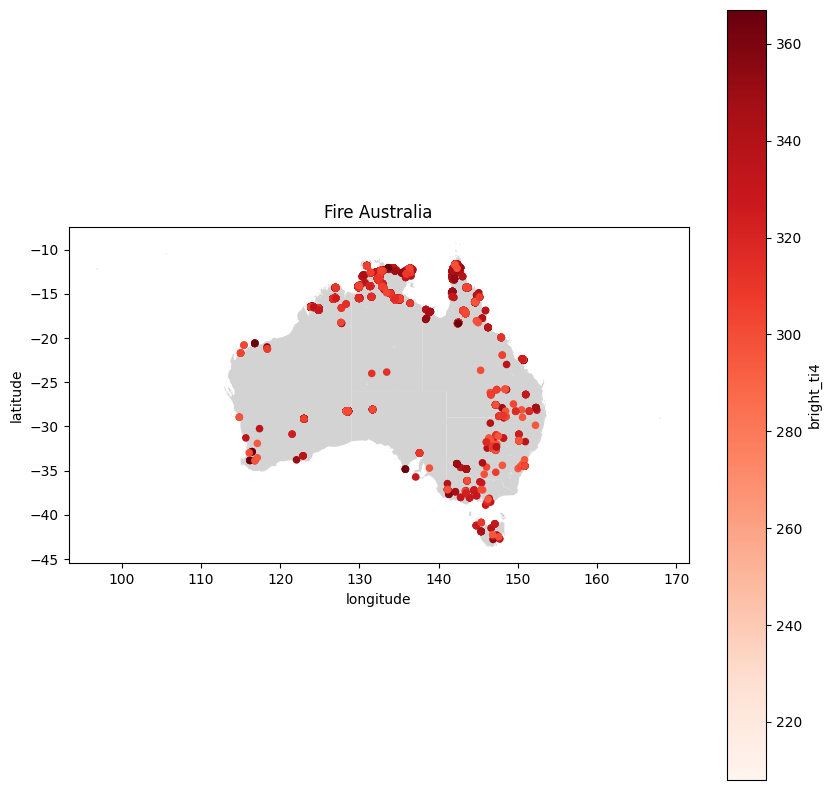

In [36]:
fig, ax = plt.subplots(figsize = (10,10))
australia_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df_fire_aus.plot(ax=ax, x="longitude", y="latitude", kind="scatter",
                   c="bright_ti4", colormap="Reds")
ax.set_title('Fire Australia')

### Patterns or anomalies noticed on the map:
I noticed bushfires in Australia occuring on the outer regions and the darker red signified higher temperature of brightness in kelvin.
I changed cool warm to red because the temp was always hot.

### Dataset #5

In [47]:
df_gpd_restaurant_manhattan = gpd.read_file('nyc_plus_loc.csv')
df_gpd_restaurant_manhattan

,Case,Restaurant,Price,Food,Decor,Service,East,latitude,longitude,geometry
0,1,Daniella Ristorante,43,22,18,20,0,40.7468312,-73.9967577,None
1,2,Tello's Ristorante,32,20,19,19,0,40.7434213,-73.9995369,None
2,3,Biricchino,34,21,13,18,0,40.7488643,-73.9955188,None
3,4,Bottino,41,20,20,17,0,40.7484846,-74.0033127,None
4,5,Da Umberto,54,24,19,21,0,40.7395815,-73.9959104,None
...,...,...,...,...,...,...,...,...,...,...
163,164,Baci,31,17,15,16,0,40.78373,-73.9782929,None
164,165,Puccini,26,20,16,17,0,40.7660899,-73.9868605,None
165,166,Bella Luna,31,18,16,17,0,40.7877657,-73.9714694,None
166,167,b'4de97469737365',38,22,17,21,0,40.8005764,-73.9675537,None


In [49]:
df_gpd_restaurant_manhattan = df_gpd_restaurant_manhattan[["Food", "latitude", "longitude"]]
df_gpd_restaurant_manhattan = df_gpd_restaurant_manhattan.astype(float)
df_gpd_restaurant_manhattan

,Food,latitude,longitude
0,22.0,40.746831,-73.996758
1,20.0,40.743421,-73.999537
2,21.0,40.748864,-73.995519
3,20.0,40.748485,-74.003313
4,24.0,40.739581,-73.995910
...,...,...,...
163,17.0,40.783730,-73.978293
164,20.0,40.766090,-73.986861
165,18.0,40.787766,-73.971469
166,22.0,40.800576,-73.967554


### Description of dataset and it's attributes:
This dataset is titled Manhattan Italian Restaurants and it reports on italian restuarants in Manhattan and it's ratings.
I focused on latitude, longitude, and food -- which was calucated on a scale.



<Axes: xlabel='longitude', ylabel='latitude'>

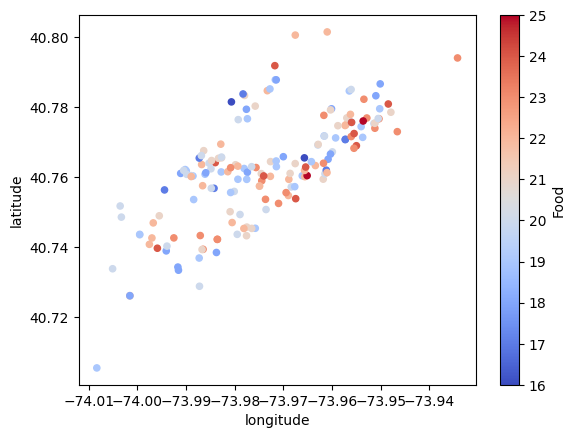

In [54]:
df_gpd_restaurant_manhattan.plot(x="longitude", y="latitude", kind="scatter",
                   c="Food", colormap="coolwarm")

### Patterns or anomalies noticed on the map:
The blue signifies higher ratings of food in italian restaurants on Manhattan, and red is lower ratings.

### Comments:
I used scatter plots because I was dealing with latitude and longitude for the datasets.